## A5

**Data Visualization II**
 
1. Use the inbuilt dataset 'titanic' as used in the 
previous assignment. Plot a box plot for distribution of age with 
respect to each gender along with the information about 
whether they survived or not. (Column names: 'sex' and 'age') 

2. Write observations on the inference from the above 
statistics.

**Link of Dataset (Titanic):**

https://www.kaggle.com/datasets/yasserh/titanic-dataset

**1) Import Required Libraries**

pandas → data handling

matplotlib & seaborn → graphs/plots

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2) Load the Dataset**

In [210]:
# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

In [211]:
# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3) Understand Dataset Structure**

In [212]:
# Dimensions of dataset
df.shape

(891, 12)

**Column Description**

| Column       | Description |
|--------------|-------------|
| PassengerId  | Unique ID of passenger |
| Survived     | Survival status (0 = No, 1 = Yes) |
| Pclass       | Passenger class (1 = Upper, 2 = Middle, 3 = Lower) |
| Name         | Name of passenger |
| Sex          | Gender |
| Age          | Age in years |
| SibSp        | No. of siblings/spouses aboard |
| Parch        | No. of parents/children aboard |
| Ticket       | Ticket number |
| Fare         | Passenger fare |
| Cabin        | Cabin number |
| Embarked     | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


In [213]:
# Datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [214]:
# Display info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [215]:
# Display statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4) Check for missing values**

In [216]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
# Percentage of missing values
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**5) Handle Missing Values**

In [218]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].mode())

In [219]:
# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [220]:
# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [221]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Data Visualization

<h3>BoxPlot</h3>

**Box Plot of Age vs Sex vs Survival**

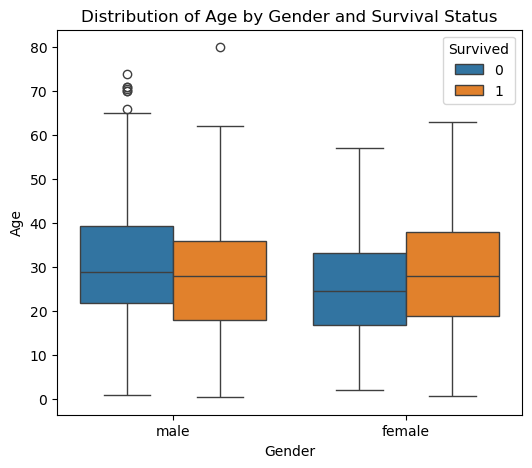

In [222]:
# Box plot showing Age distribution by Sex and Survival status
plt.figure(figsize=(6, 5))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title("Distribution of Age by Gender and Survival Status")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

---
**Inferences:**

1. The survived group is more prominent among females than males, indicating that more females survived compared to males.

2. The non-survived group is more prominent among males than females, indicating that a greater number of males did not survive.

3. The median age of females is higher in the survived group than in the non-survived group, indicating that adult women had a higher survival rate.

4. The median age of males is lower in the survived group than in the non-survived group, indicating that younger males survived more than older males.

5. The interquartile range (IQR) shows ages between 20 and 40, indicating that the majority of Titanic passengers were young to middle-aged adults.

6. The outliers among males indicate that many of the males who did not survive were older passengers.

---

**Conclusion:**

The majority of survivors were young children and females, while most non-survivors were males and older passengers. 

Overall, the Titanic was largely populated by young to middle-aged adults.

---